<a href="https://colab.research.google.com/github/ShubhamHaran/snippets/blob/master/Watershed_Algorithm_and_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'Treshold'),
 <matplotlib.image.AxesImage at 0x7f11981bc0f0>)

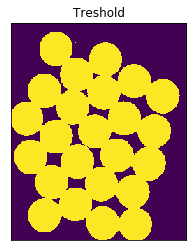

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/water_coins.jpg',1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.xticks([]),plt.yticks([]),plt.title("Treshold"),plt.imshow(thresh)

(<matplotlib.image.AxesImage at 0x7f11976728d0>,
 Text(0.5, 1.0, 'Distance Transform'))

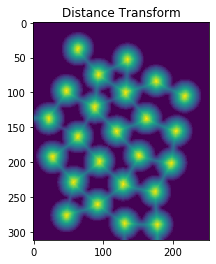

In [25]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
plt.imshow(dist_transform),plt.title("Distance Transform")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f11976376d8>,
 Text(0.5, 1.0, 'SURE FG'))

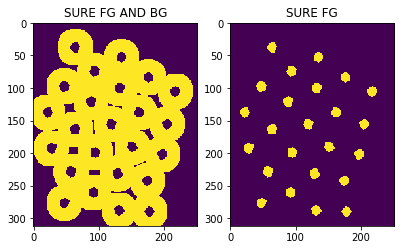

In [26]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
fig=plt.figure(figsize=(10,10))
fig.add_subplot(131),plt.imshow(unknown),plt.title("SURE FG AND BG")
fig.add_subplot(132),plt.imshow(sure_fg),plt.title("SURE FG")


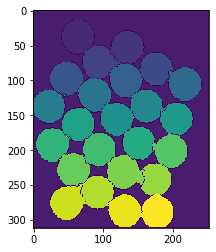

In [27]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
# First example: object detection.
noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30
noise = (noise_mask * np.random.random(noise_mask.shape)-0.5*noise_mask).astype(np.uint8)

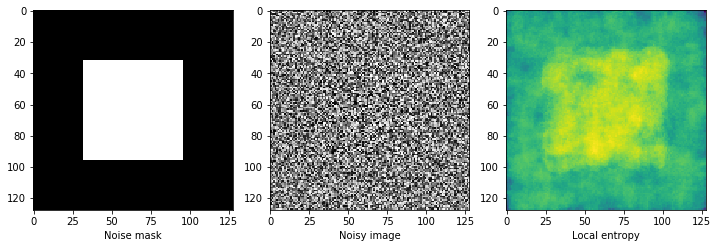

In [29]:
img = noise + 128
entr_img = entropy(img, disk(10))
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")
fig.tight_layout()

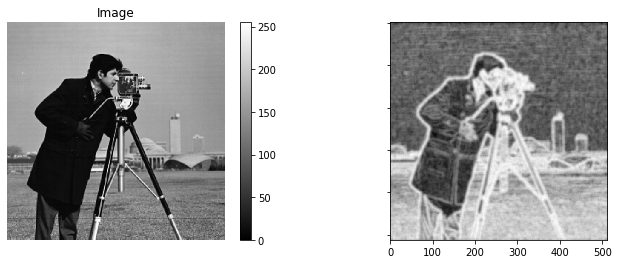

In [30]:
image = img_as_ubyte(data.camera())
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
sharex=True, sharey=True)
img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)
img1 = ax1.imshow(entropy(image,disk(5)), cmap='gray')
plt.show()

In [0]:
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)
fig.tight_layout()
plt.show()